In [7]:
%matplotlib nbagg
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from os.path import dirname
from os.path import join
from sklearn.tree import DecisionTreeClassifier
from __future__ import division


In [8]:
class Bunch(dict):
   
    def __init__(self, **kwargs):
        dict.__init__(self, kwargs)

    def __setattr__(self, key, value):
        self[key] = value

    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(key)

    def __setstate__(self, state):
        # Bunch pickles generated with scikit-learn 0.16.* have an non
        # empty __dict__. This causes a surprising behaviour when
        # loading these pickles scikit-learn 0.17: reading bunch.key
        # uses __dict__ but assigning to bunch.key use __setattr__ and
        # only changes bunch['key']. More details can be found at:
        # https://github.com/scikit-learn/scikit-learn/issues/6196.
        # Overriding __setstate__ to be a noop has the effect of
        # ignoring the pickled __dict__
        pass

In [9]:
def load_banana(dataset):
    if (dataset == "train"):
        data = 'banana_train.csv'
        n_samples = 3500
        n_features = 2
    else:
        data = 'banana_test.csv'
        n_samples = 1800
        n_features = 2
    module_path = os.path.dirname('__file__')
    with open(join(module_path, 'data', data)) as csv_file:
        data_file = csv.reader(csv_file)
        target_names = ['class1','class2'] 
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, item in enumerate(data_file):
            data[i] = np.asarray(item[1:], dtype=np.float)
            target[i] = np.asarray(item[0], dtype=np.int)

    return Bunch(data=data, target=target,
                 target_names=target_names,
                 feature_names=['feature1','feature2'])

In [10]:
def fix_labels(dataset):
    for i, item in enumerate(dataset):
        if(item == -1):
            dataset[i] = 0
    return dataset

In [11]:
def shuffle_data(X,y):
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    return X,y

In [12]:
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    return X

### Problem 2.1 : Visualization of sklearn implementation of decision tree for Banana Dataset

In [43]:
# Parameters
n_classes = 2
plot_colors = 'br'
plot_step = 0.02

# Load data
banana_train = load_banana("train")
banana_test = load_banana("test")

banana_train.target = fix_labels(banana_train.target)
banana_test.target = fix_labels(banana_test.target)

# We only take the two corresponding features
X = banana_train.data
y = banana_train.target

X_test = banana_test.data
y_test = banana_test.target

# Shuffle
X,y = shuffle_data(X,y)
X_test,y_test = shuffle_data(X_test,y_test)

# Standardize
X = standardize(X)
X_test = standardize(X_test)


In [16]:
# Train
clf = DecisionTreeClassifier().fit(X, y)

<IPython.core.display.Javascript object>


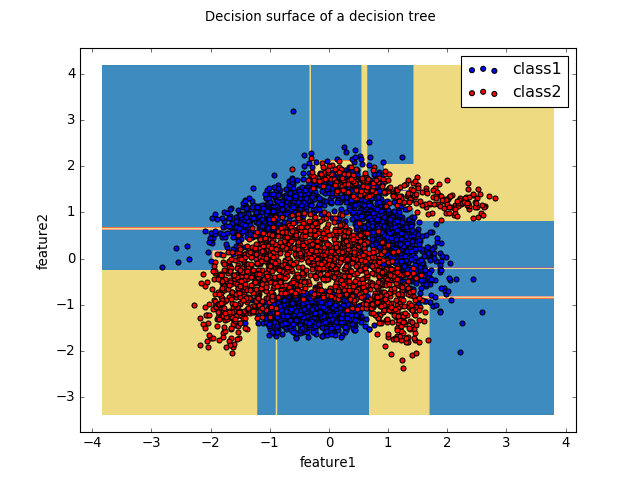

In [19]:
plt.close()
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel(banana_train.feature_names[0])
plt.ylabel(banana_train.feature_names[1])
plt.axis("tight")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=banana_train.target_names[i],
                cmap=plt.cm.Paired)

plt.axis("tight")

plt.suptitle("Decision surface of a decision tree")
plt.legend()
plt.show()

In [20]:
plt.close()

### Problem 2.2 : Observations by changing the depth of the decision trees

<IPython.core.display.Javascript object>


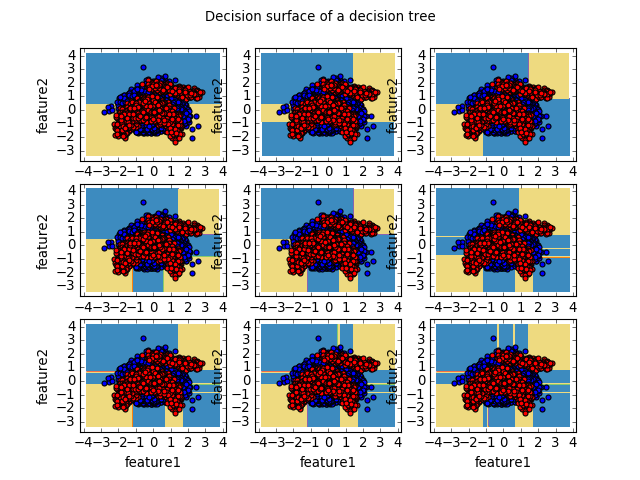

In [21]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i).fit(X, y)
    plt.subplot(3, 3, i)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(banana_train.feature_names[0])
    plt.ylabel(banana_train.feature_names[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.Paired)

    plt.axis("tight")

    plt.suptitle("Decision surface of a decision tree")
    plt.legend()
    plt.show()



#### Observations 

* The classification gets better as we increase the depth of the tree. This is because the leaf nodes get purer as we increase the number of split conditions.

### Problem 2.3 : Training error Vs Test Error as a function of depth

<IPython.core.display.Javascript object>


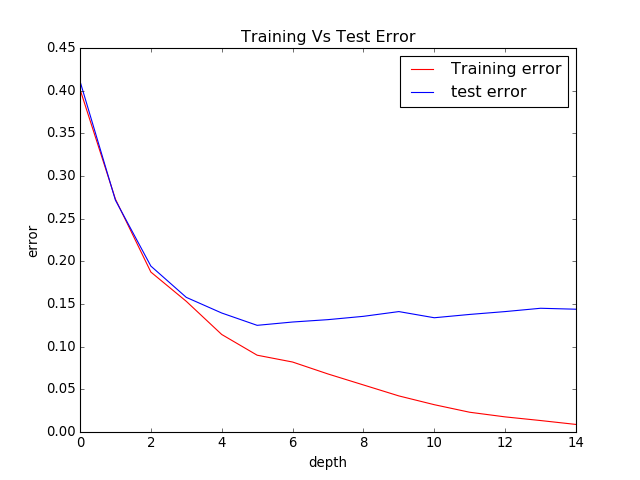

In [22]:
depth = 15
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)


plt.close()
plt.title("Training Vs Test Error")
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r',label = "Training error")
plt.plot(test_score,'b', label = "test error")
plt.legend()
    

### Observation: 
* As the depth increases the training error decreases to zero.
* As the depth increases the test error decreases to a point but starts increases after a sweet spot. Test error is least when depth = 2

### Problem 2.4: Experimentation with other hyper-parameters

#### min_samples_split=500

[ 0.41111111  0.27166667  0.19833333  0.16166667  0.16166667  0.15777778
  0.15777778  0.15777778  0.15777778  0.15777778]


<IPython.core.display.Javascript object>


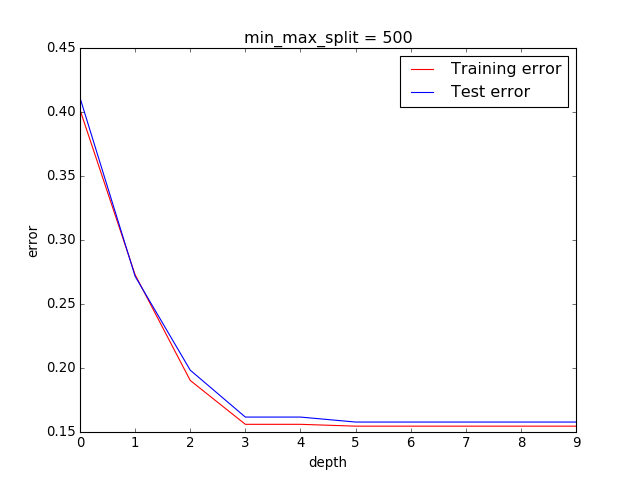

In [25]:
depth = 10
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i,min_samples_split=500).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)
    
print test_score

plt.close()
plt.title("min_max_split = 500")
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r', label = "Training error")
plt.plot(test_score,'b', label = "Test error")
plt.legend()

### Observation

* Combination with max-depth=3, min_samples_split = 500 stabilizes generalization error to 0.5634 for further depths

[ 0.41111111  0.295       0.25666667  0.25666667  0.25666667  0.25666667
  0.25666667  0.25666667  0.25666667  0.25666667]


<IPython.core.display.Javascript object>


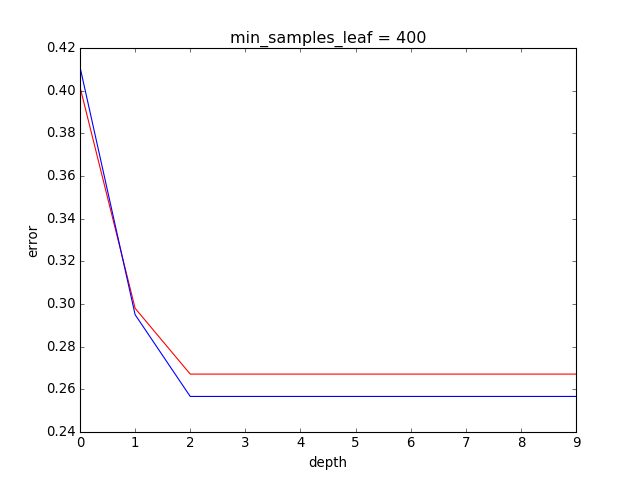

In [26]:
depth = 10
training_score = np.empty(depth)
test_score = np.empty(depth)
for i in range(1,depth+1):
    clf = DecisionTreeClassifier(max_depth = i,min_samples_leaf=400).fit(X, y)
    training_score[i-1] = 1 - clf.score(X,y)
    test_score[i-1] = 1 - clf.score(X_test,y_test)
    
print test_score

plt.close()
plt.title("min_samples_leaf = 400")
plt.xlabel("depth")
plt.ylabel("error")
plt.plot(training_score,'r',label = "training error")
plt.plot(test_score,'b', label = "test error")

#### Observation :

*Having min_samples_leaf = 400 improves the test error rate. The error rate in test is less than the error rate in training set

### Problem 3.1 Adaboost

In [47]:
banana_train = load_banana("train")
banana_test = load_banana("test")

# We only take the two corresponding features
X = banana_train.data
y = banana_train.target

X_test = banana_test.data
y_test = banana_test.target

# Shuffle
X,y = shuffle_data(X,y)
X_test,y_test = shuffle_data(X_test,y_test)

# Standardize
X = standardize(X)
X_test = standardize(X_test)

In [48]:
class Adaboost:
    def __init__(self,num_rounds):
        self.num_rounds = num_rounds
        self.models = []
    
    def fit(self,X,y,w):
        outputs = np.empty([self.num_rounds,X.shape[0]])
        alpha = [None] * self.num_rounds
        for m in range(self.num_rounds):
            clf = DecisionTreeClassifier(max_depth=3).fit(X,y,sample_weight = w)
            self.models.append(clf)
            outputs[m] = clf.predict(X)

            mask = outputs[m] != y
            error = np.sum(w[mask])/np.sum(w)
    
            alpha[m] = np.log((1-error)/error)
            for i in range(w.shape[0]):
                if(outputs[m][i] != y[i]):
                    w[i] = w[i]*np.log((1-error)/error)
            
        return self
    
    def predict(self,X):
        outputs = np.empty([self.num_rounds,X.shape[0]])
        final_output = np.zeros(X.shape[0])
        for m in range(self.num_rounds):
            outputs[m] = self.models[m].predict(X)
            final_output += outputs[m]
        
        mask = final_output > 0
        final_output[mask] = 1
        final_output[mask == False] = -1
        
        return final_output
        
    def error(self,X,y):
        outputs = []
        outputs = self.predict(X)
        mask = outputs != y
        return np.sum(mask)/X.shape[0]

<IPython.core.display.Javascript object>


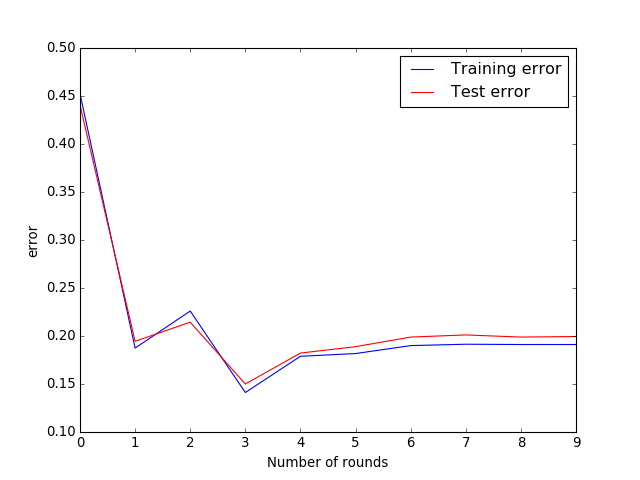

In [49]:
train_error = []
test_error = []

for m in range(10):
    w = np.ones(X.shape[0])/X.shape[0]
    ab = Adaboost(m)
    ab.fit(X,y,w)

    train_error.append(ab.error(X,y))
    test_error.append(ab.error(X_test,y_test))

plt.close()
plt.xlabel("Number of rounds")
plt.ylabel("error")
plt.plot(train_error,'b',label = "Training error")
plt.plot(test_error,'r', label = "Test error")
plt.legend()

### Observations

* The error tends to decrease with the increase in number of rounds, for both test and training errors; unlike the previous models that we have seen.
* The error becomes almost constant after a certain point of time for test and training errors

<IPython.core.display.Javascript object>


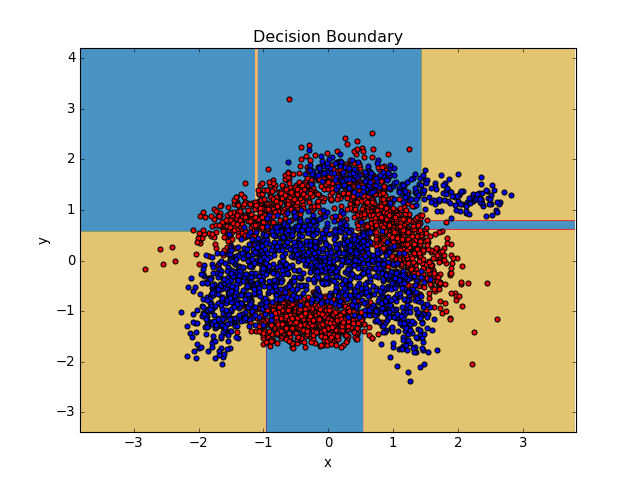

In [46]:
plt.close()
plot_colors = "rb"
plot_step = 0.02
class_names = "AB"

w = np.ones(X.shape[0])/X.shape[0]
clf = Adaboost(10)
clf.fit(X,y,w)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.Paired)
    plt.axis("tight")
        
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
